<a href="https://colab.research.google.com/github/ammusin/Respiratory_disease_detection/blob/main/DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkarmanohardalvi/lungs-disease-dataset-4-types")

print("Path to dataset files:", path)

100%|██████████| 2.02G/2.02G [00:52<00:00, 41.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types/versions/1


In [ ]:
import os
base_path = '/root/.cache/kagglehub/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types/versions/1'

print(os.listdir(base_path))

['Lung Disease Dataset']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121

# 1. Data Augmentation
train_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.5],
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255
)
val_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

# 2. Data Loading
train_data = train_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'train'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'val'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'test'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=False
)

# 3. Model Building (ResNet50)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128,128,3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(5, activation='softmax')
])

model.summary()


# 4. Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Early Stopping
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

# 6. Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stopping]
)


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,042,629 (26.87 MB)

 Trainable params: 6,958,981 (26.55 MB)

 Non-trainable params: 83,648 (326.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.5970 - loss: 1.0160 - val_accuracy: 0.5962 - val_loss: 1.2082
Epoch 2/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8177 - loss: 0.4439 - val_accuracy: 0.5833 - val_loss: 1.2126
Epoch 3/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8338 - loss: 0.4042 - val_accuracy: 0.7569 - val_loss: 0.5627
Epoch 4/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8493 - loss: 0.3633 - val_accuracy: 0.7788 - val_loss: 0.5249
Epoch 5/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8658 - loss: 0.3224 - val_accuracy: 0.7956 - val_loss: 0.5084
Epoch 6/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8782 - loss: 0.2940 - val_accuracy: 0.8259 - val_loss: 0.4162
Epoch 7/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8879 - loss: 0.2693 - val_accuracy: 0.8562 - val_loss: 0.3342
Epoch 8/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8809 - loss: 0.2728 - val_accuracy: 0.7932 - val_los

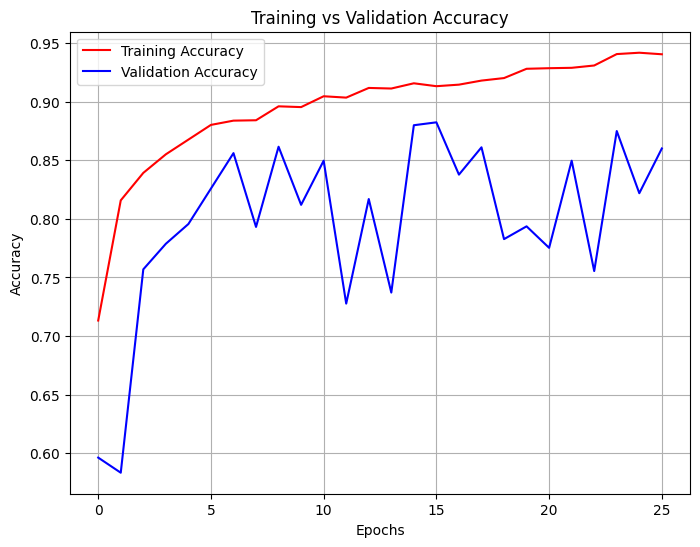

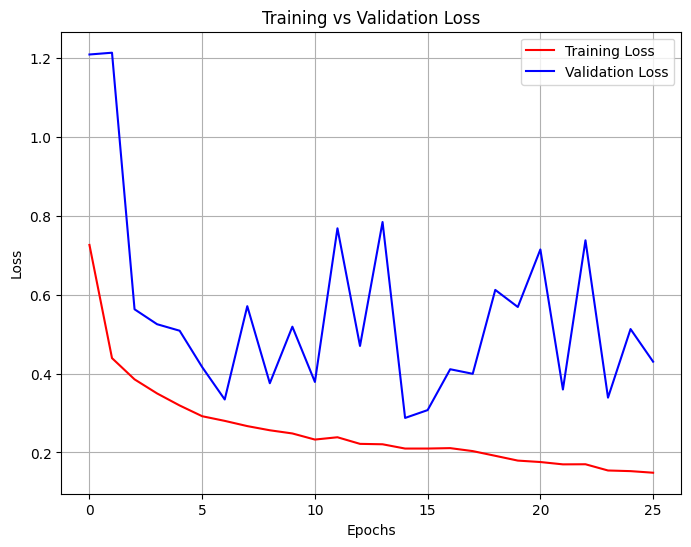

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy", color='r')
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color='b')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss graph
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss", color='r')
plt.plot(history.history["val_loss"], label="Validation Loss", color='b')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: Bacterial Pneumonia


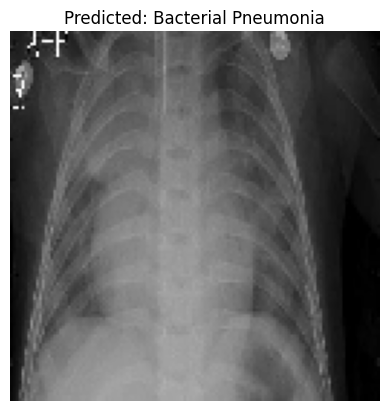

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your image
img_path = '/content/bp.jpeg'  # 🔥 Change to your test image path
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")

# 2. Convert to array
img_array = image.img_to_array(img)

# 3. Normalize
img_array = img_array / 255.0

# 4. Expand dimensions (batch format)
img_array = np.expand_dims(img_array, axis=0)

# 5. Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# 6. Map the prediction back to class name
class_labels = list(test_data.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# 7. Visualize the image
plt.imshow(img_array[0])
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
